In [33]:
import pandas as pd
from textblob import TextBlob
import re
import matplotlib.pyplot as plt

In [34]:
def clean_text(text):
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    return text

In [35]:
def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity
    return polarity, subjectivity

In [36]:
def plot_pol_sub_histograms(data):
    # plot histograms of polarity and subjectivity scores
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].hist(data['polarity'], bins=20)
    ax[0].set_xlabel('Polarity')
    ax[0].set_ylabel('Frequency')
    ax[0].set_title('Distribution of Polarity Scores')
    ax[1].hist(data['subjectivity'], bins=20)
    ax[1].set_xlabel('Subjectivity')
    ax[1].set_ylabel('Frequency')
    ax[1].set_title('Distribution of Subjectivity Scores')
    plt.show()

In [37]:
def plot_pol_sub_scatter(data):
    # plot scatter plot of polarity and subjectivity scores
    plt.scatter(data['polarity'], data['subjectivity'])
    plt.xlabel('Polarity')
    plt.ylabel('Subjectivity')
    plt.title('Scatter Plot of Polarity and Subjectivity Scores')
    plt.show()

In [51]:
# compare polarity and subjectivity scores for different app versions
def plot_pol_sub_ver_boxplot(data):
    # compare polarity and subjectivity scores for different app versions
    data.boxplot(column=['polarity'], by=['reviewCreatedVersion'], figsize=(80, 10))
    plt.title('Polarity Scores by App Version')
    plt.suptitle('')
    plt.xlabel('App Version')
    plt.ylabel('Polarity')
    plt.show()

    data.boxplot(column=['subjectivity'], by=['reviewCreatedVersion'], figsize=(80, 10))
    plt.title('Subjectivity Scores by App Version')
    plt.suptitle('')
    plt.xlabel('App Version')
    plt.ylabel('Subjectivity')
    plt.show()

In [39]:
# there are 5 csv files in the folder they are aptly names app_reviews_1.csv to app_reviews_5.csv combine them into one dataframe called data

data = pd.read_csv('../../Warehouse/Reviews/app_reviews_1.csv')

for i in range(2,6):
    data_t = pd.read_csv('../../Warehouse/Reviews/app_reviews_'+str(i)+'.csv')
    data = pd.concat([data, data_t])

In [60]:
data['cleaned_review'] = data['content'].apply(clean_text)
data['polarity'], data['subjectivity'] = zip(*data['cleaned_review'].apply(get_sentiment))

data.to_csv('app_reviews_cleaned_sorted.csv', index=False)

Polarity is a metric that ranges from -1 to 1 and measures the sentiment of a piece of text. A score close to -1 represents very negative sentiment, while a score close to 1 indicates very positive sentiment. A polarity score tending towards 0 means the text is neutral, with no strong positive or negative sentiment. In this histogram, the x-axis represents polarity scores, and the y-axis shows the frequency (or number) of reviews with those scores.

Subjectivity is a metric that ranges from 0 to 1 and measures the degree of personal opinion, emotion, or judgment in a piece of text. A score close to 0 means the text is more objective or factual, whereas a score close to 1 indicates the text is more subjective or opinionated. In this histogram, the x-axis represents subjectivity scores, and the y-axis shows the frequency of reviews with those scores.

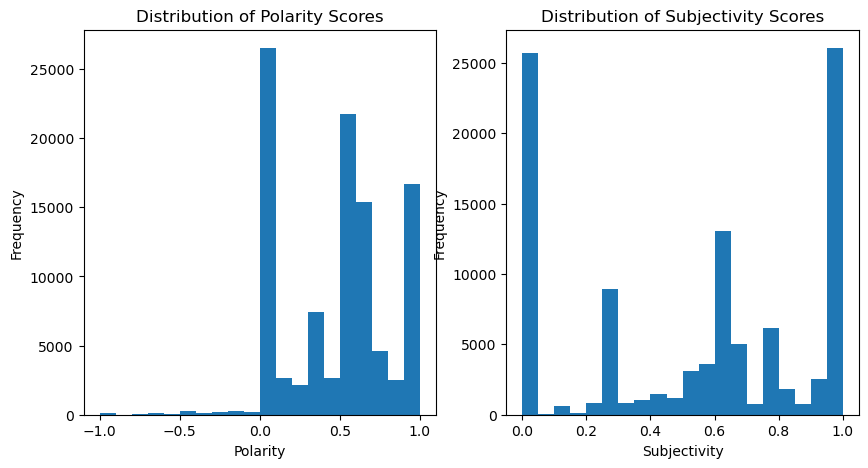

In [61]:
plot_pol_sub_histograms(data)

This is a boxplot comparing polarity scores across different app versions. Each box represents the distribution of polarity scores for a specific app version. The box extends from the 25th percentile (Q1) to the 75th percentile (Q3), with the median (Q2, or 50th percentile) represented as a line inside the box. The whiskers extend from Q1-1.5IQR to Q3+1.5IQR, where IQR is the interquartile range (Q3-Q1). Points outside the whiskers are considered outliers. The x-axis shows the different app versions, and the y-axis represents polarity scores.

This is a boxplot comparing subjectivity scores across different app versions. It is structured similarly to the polarity boxplot, but it represents subjectivity scores instead of polarity scores. The x-axis shows the different app versions, and the y-axis represents subjectivity scores.

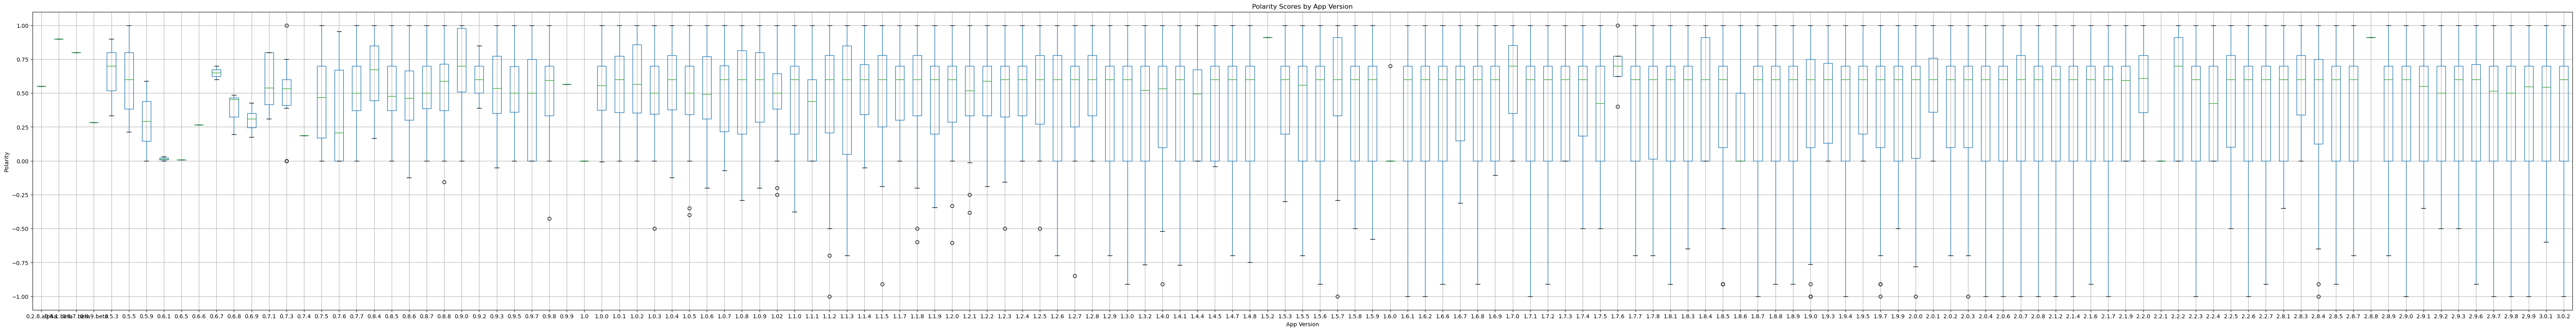

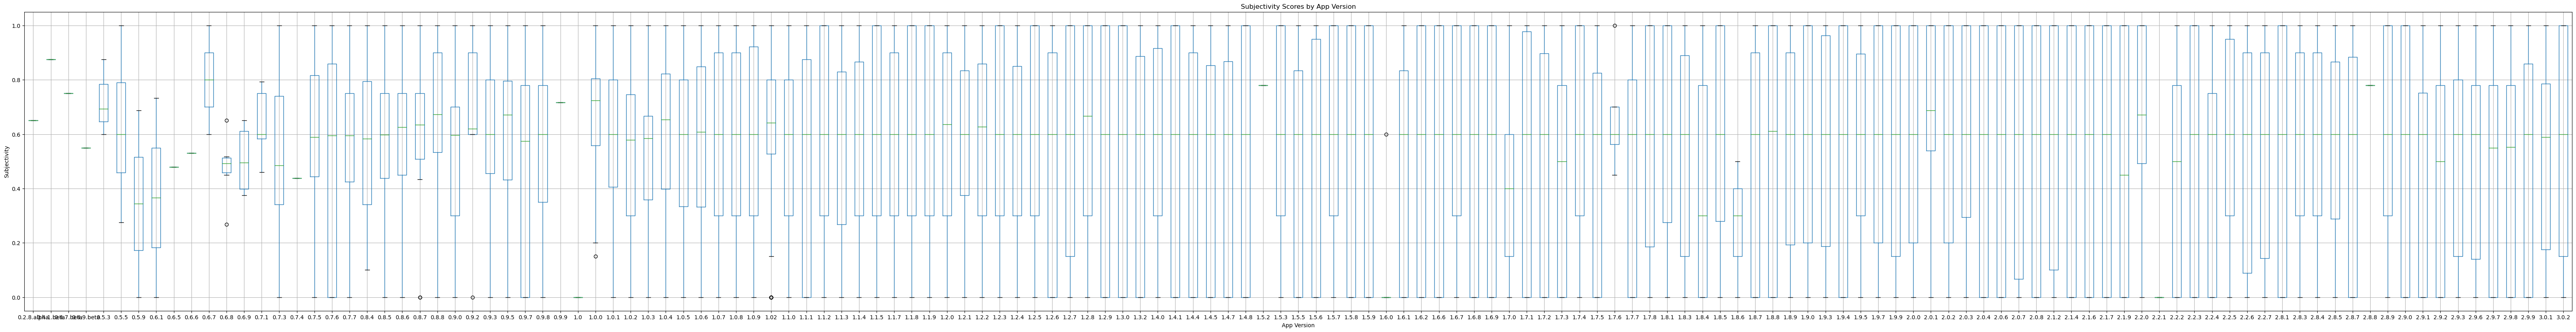

In [62]:
plot_pol_sub_ver_boxplot(data)

A scatterplot shows the relationship between two variables. In the scatterplot above, we can see that there is a positive relationship between polarity and subjectivity scores. This means that the higher the subjectivity score, the higher the polarity score. This is expected because users who have a strong opinion about a product are more likely to give it a high score. As for the distribution of polarity scores, we can see that it is skewed to the right. This means that most of the reviews are positive. However, this does not mean that the app is popular. It is also possible that most of the users who downloaded the app are not very tech savvy, and are not able to give a proper review. This is a limitation of the data, and we cannot do anything about it. However, we can still use the polarity and subjectivity scores to analyze the sentiment of the reviews.

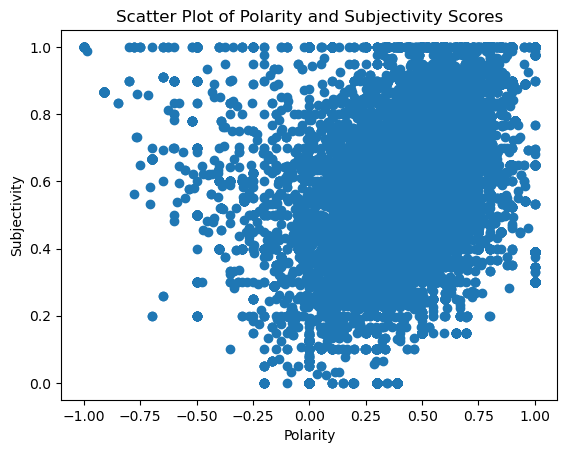

In [63]:
plot_pol_sub_scatter(data)

Ananlysis for 1 star reviews


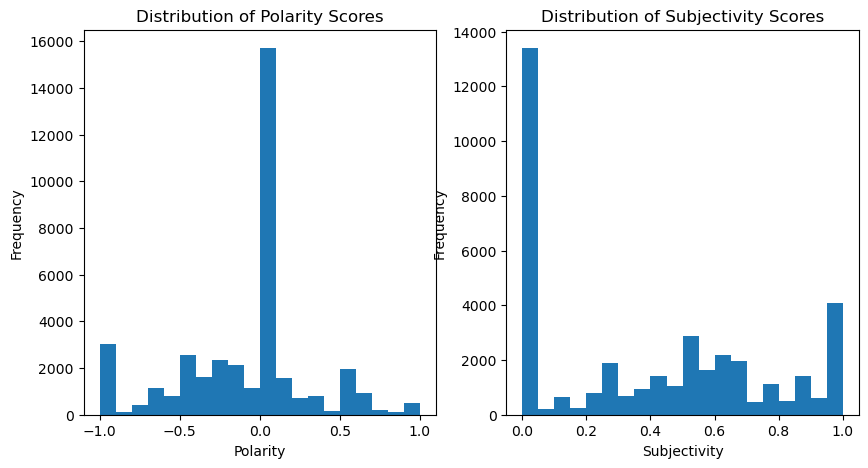

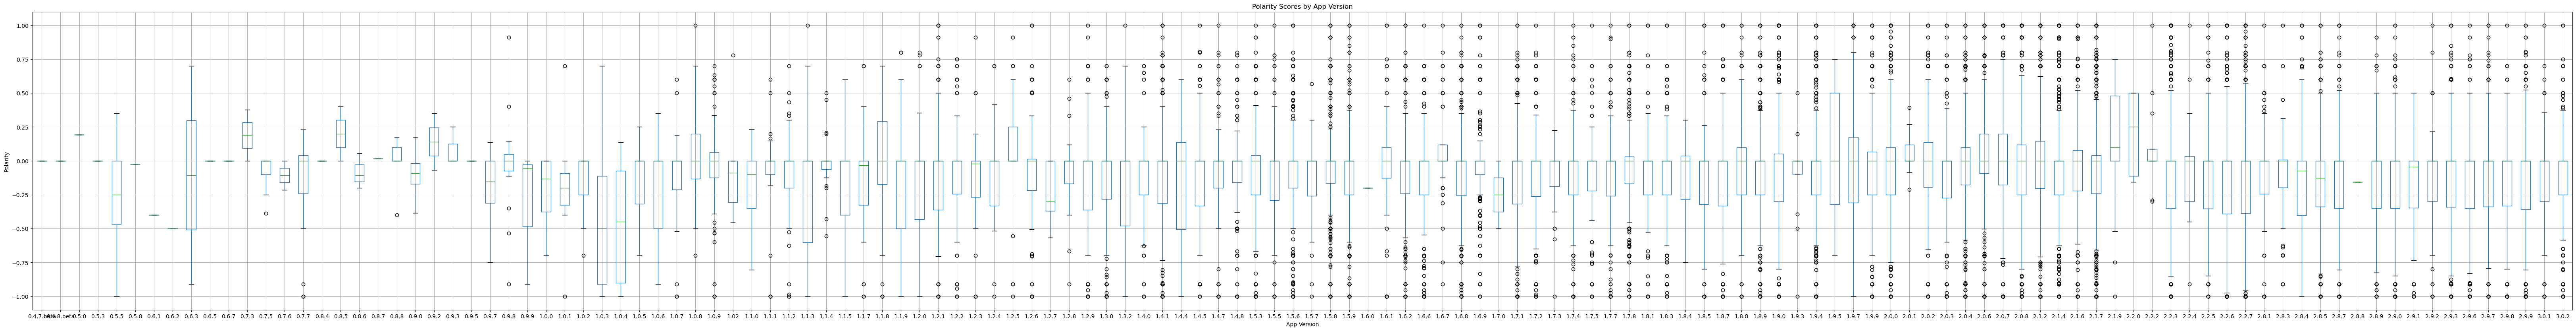

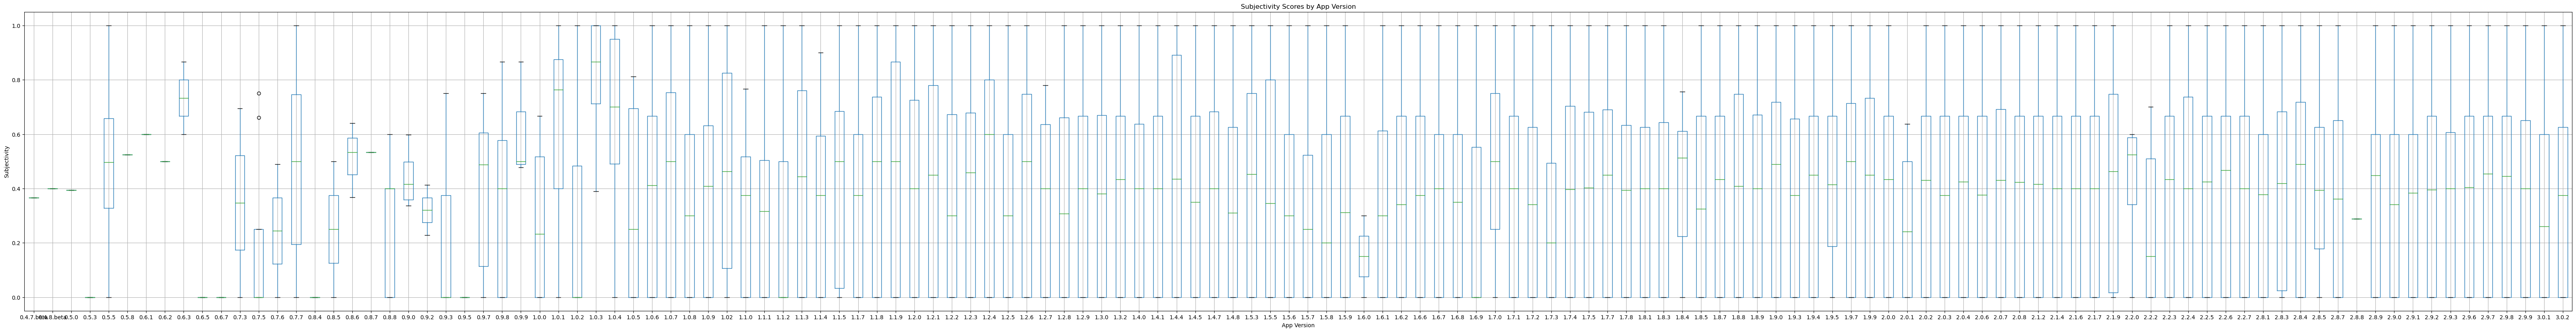

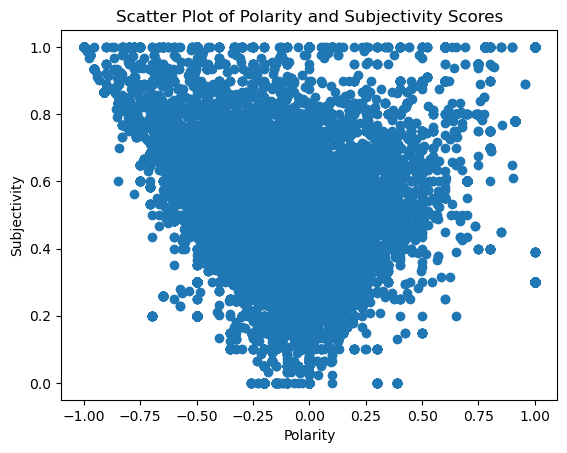

Ananlysis for 2 star reviews


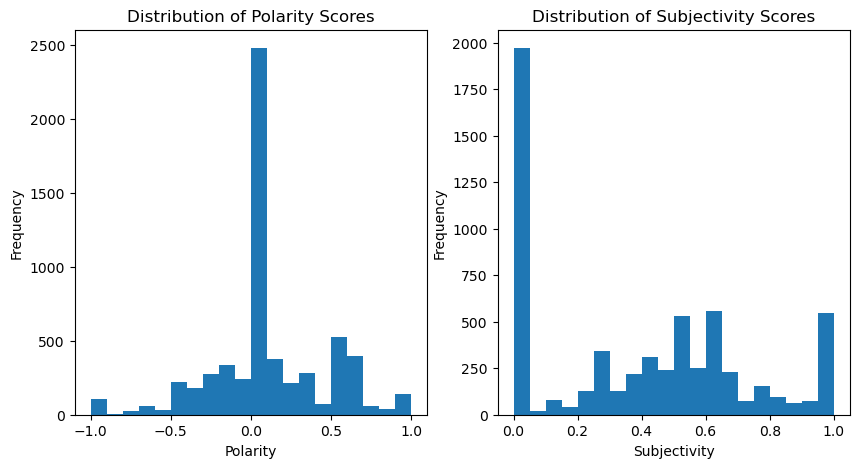

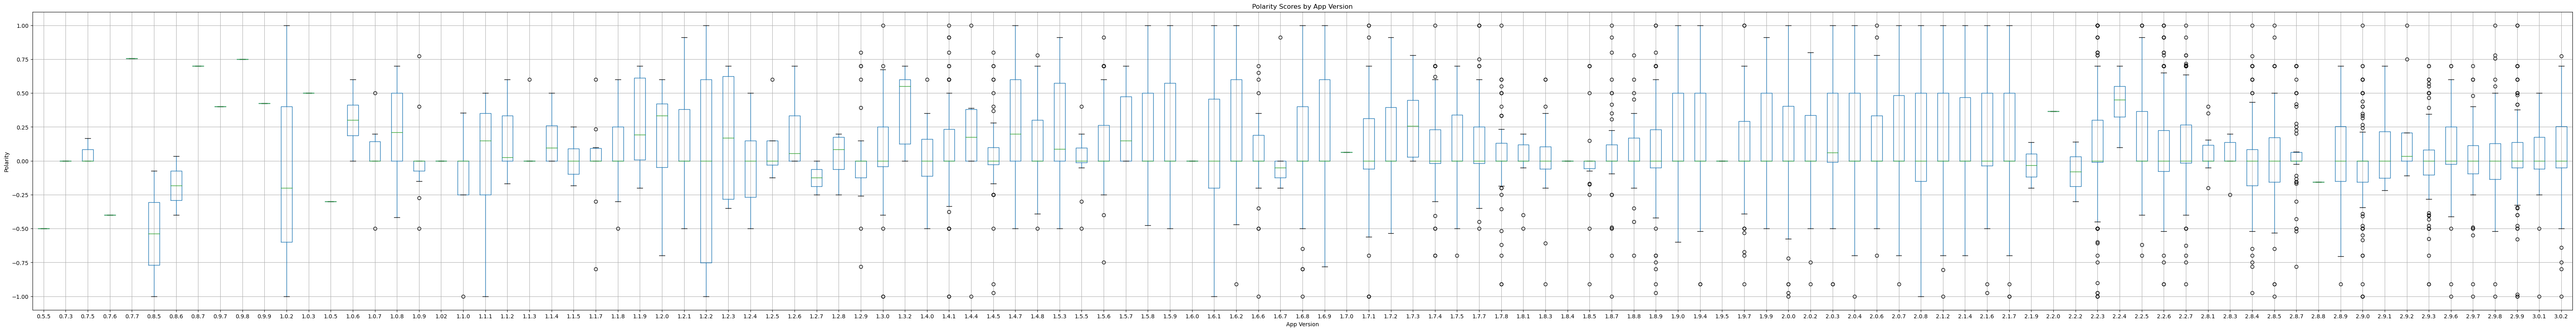

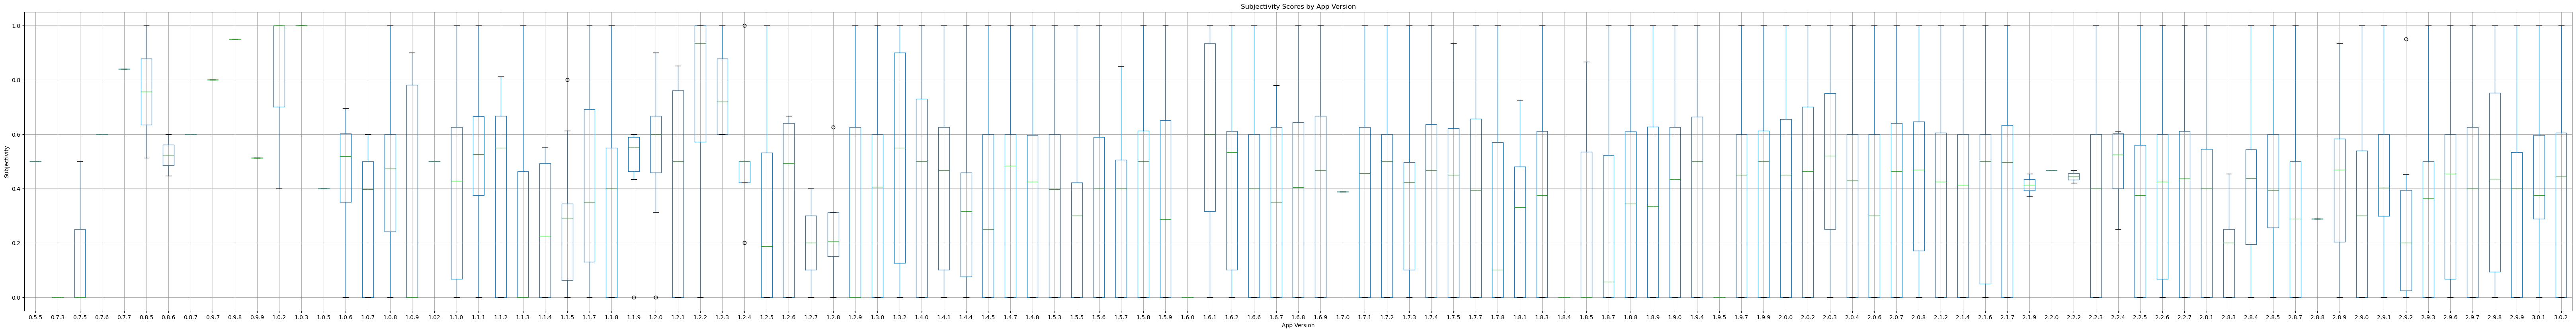

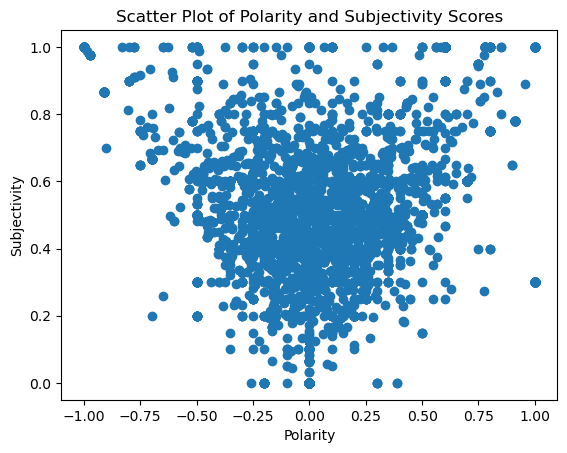

Ananlysis for 3 star reviews


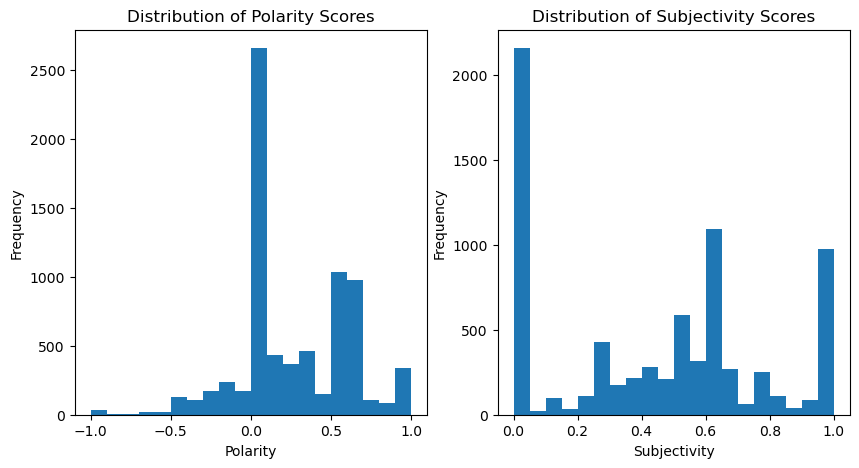

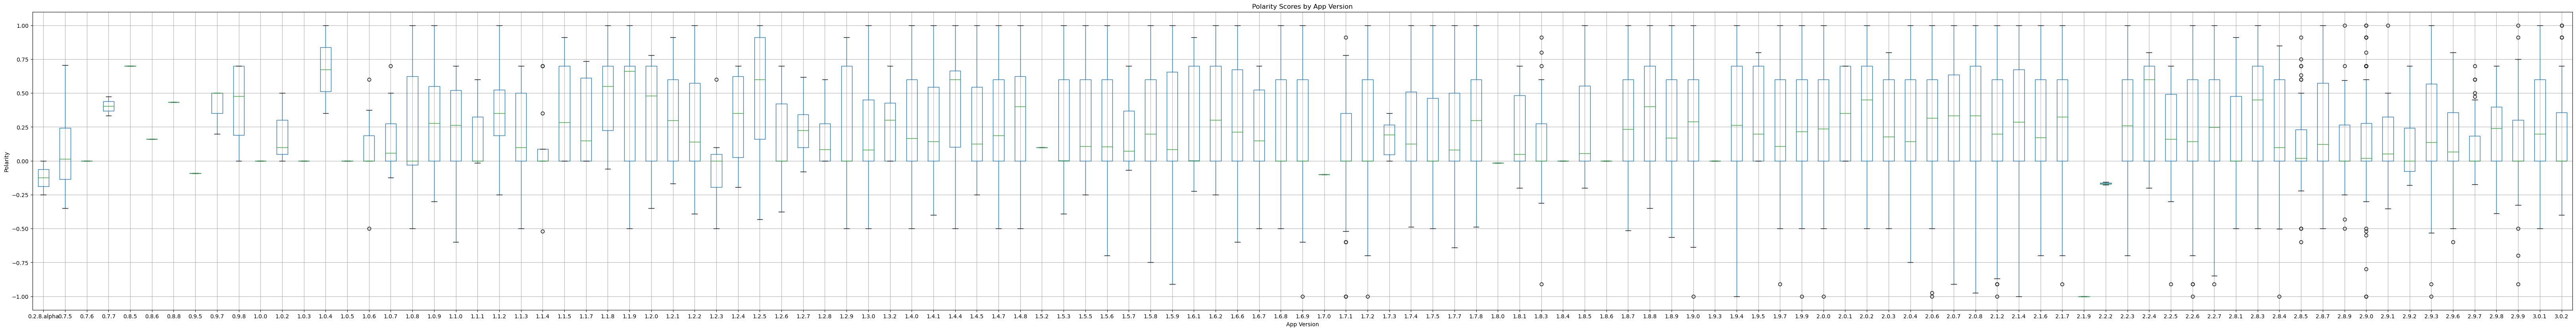

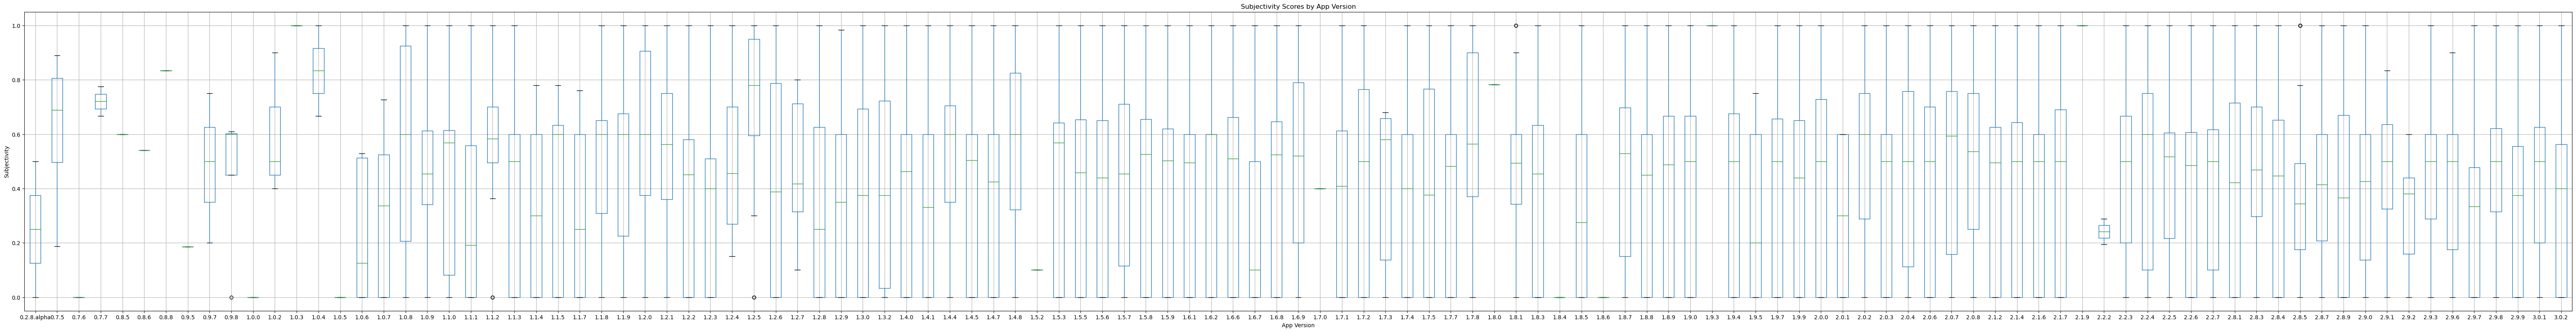

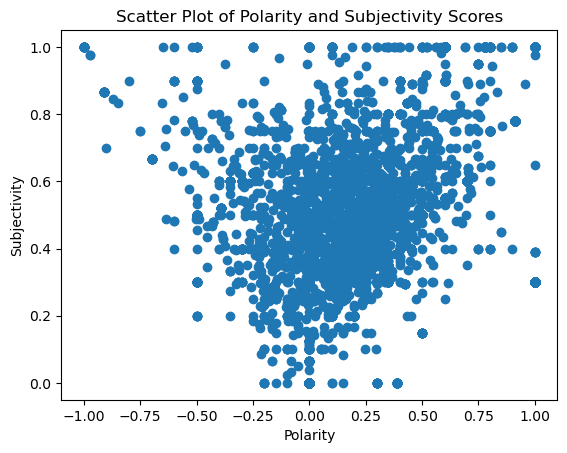

Ananlysis for 4 star reviews


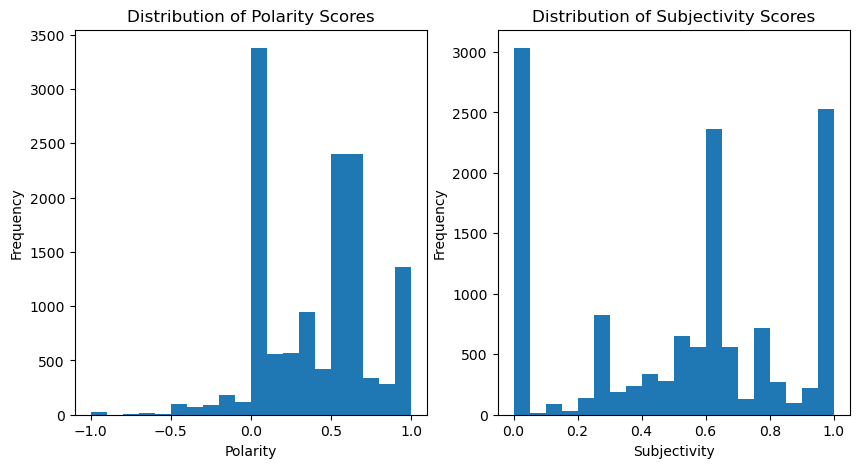

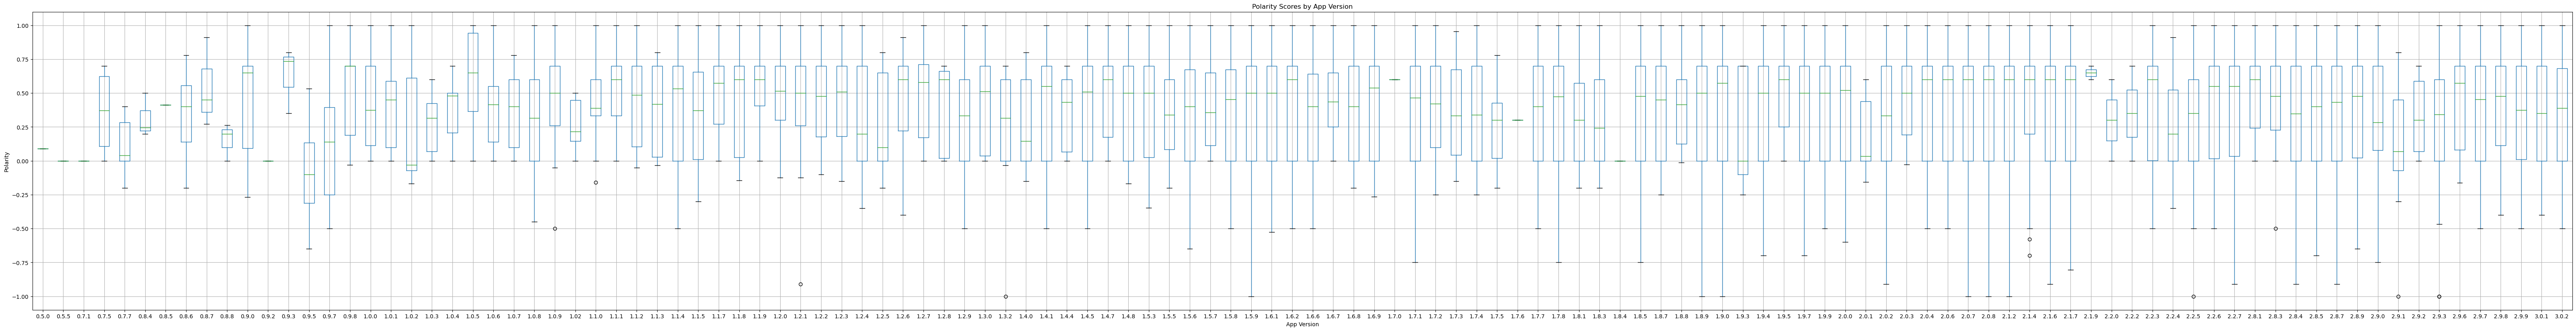

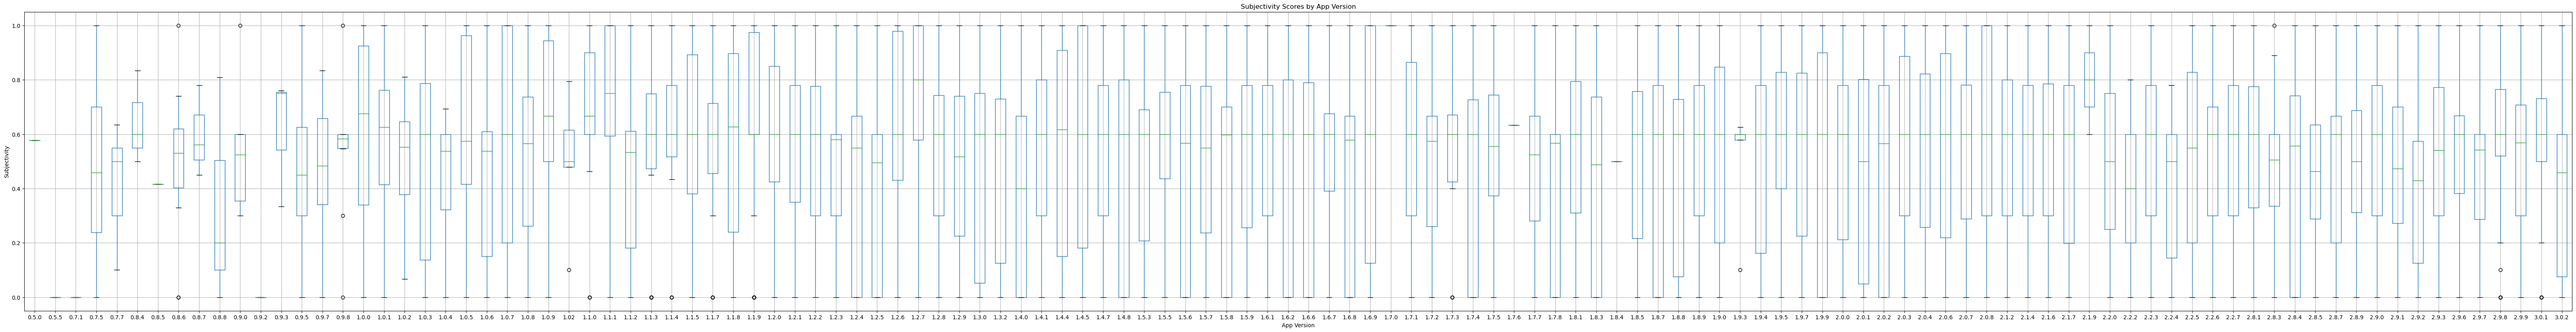

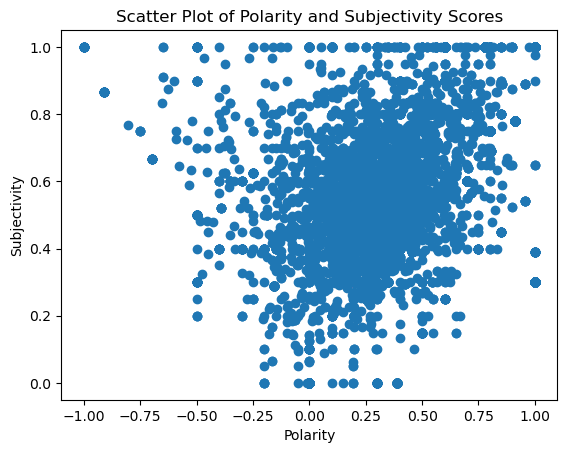

Ananlysis for 5 star reviews


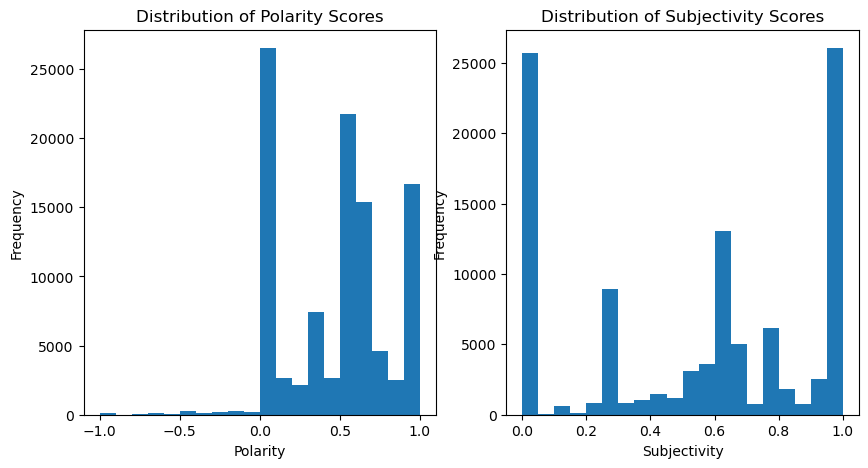

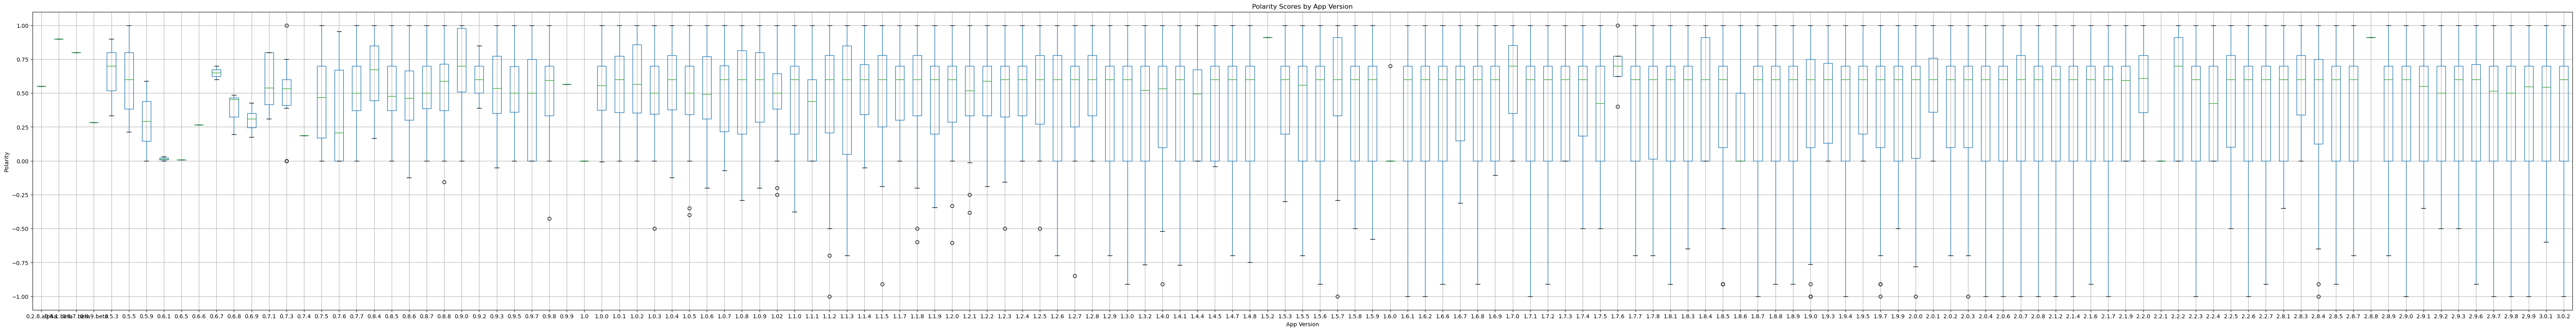

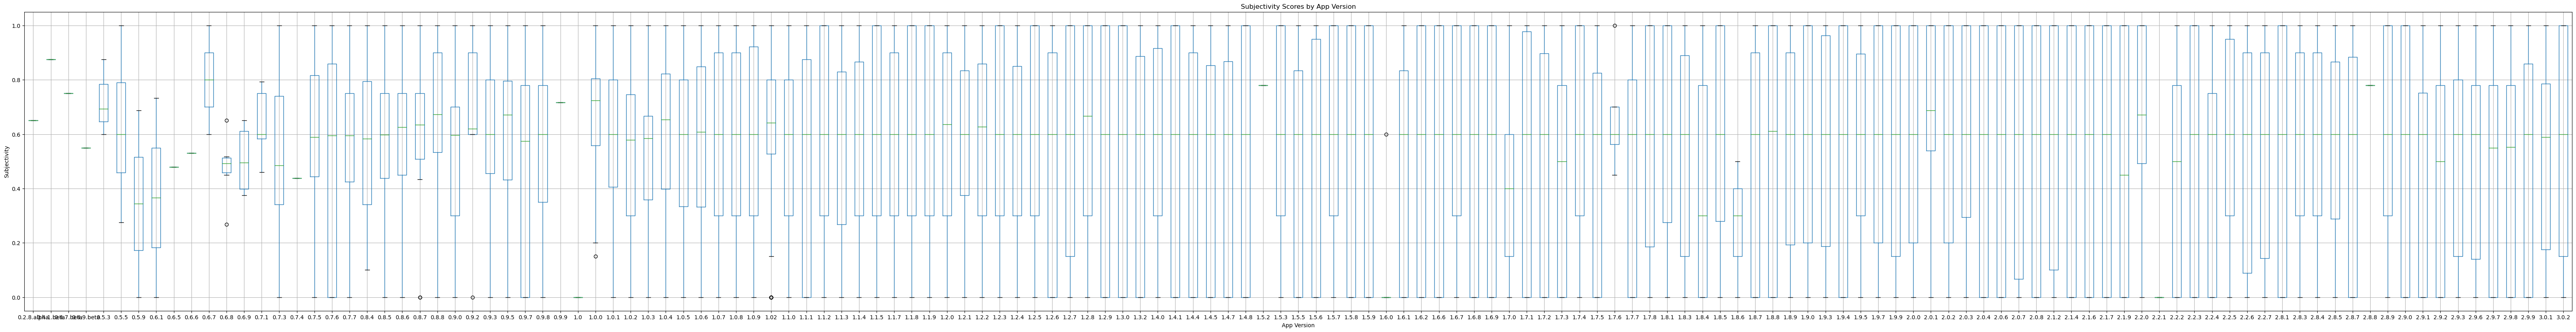

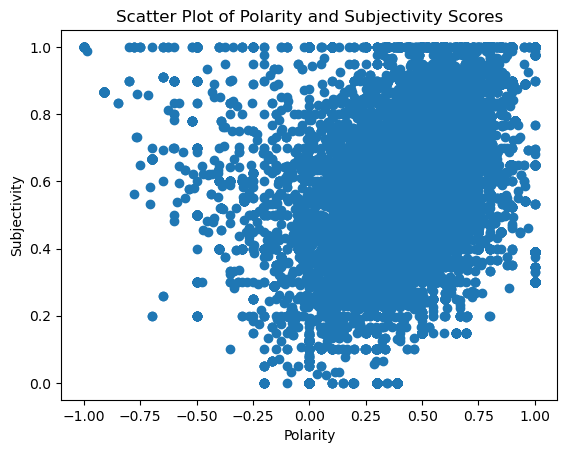

In [65]:
for i in range(1,6):
    data = pd.read_csv('../../Warehouse/Reviews/app_reviews_'+str(i)+'.csv')
    
    print("Ananlysis for",i,"star reviews")

    data['cleaned_review'] = data['content'].apply(clean_text)
    data['polarity'], data['subjectivity'] = zip(*data['cleaned_review'].apply(get_sentiment))

    filename = "app_reviews_"+str(i)+"_cleaned_sorted.csv"
    data.to_csv(filename, index=False)

    plot_pol_sub_histograms(data)
    plot_pol_sub_ver_boxplot(data)
    plot_pol_sub_scatter(data)